<a href="https://colab.research.google.com/github/felipeMarroquinTepale/mineria-predecir-promo/blob/main/Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dcwljxu/ca77qp08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1dcwljxu/jmd4d1_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4687', 'data', 'file=/tmp/tmp1dcwljxu/ca77qp08.json', 'init=/tmp/tmp1dcwljxu/jmd4d1_u.json', 'output', 'file=/tmp/tmp1dcwljxu/prophet_model2z_na01k/prophet_model-20221206195339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


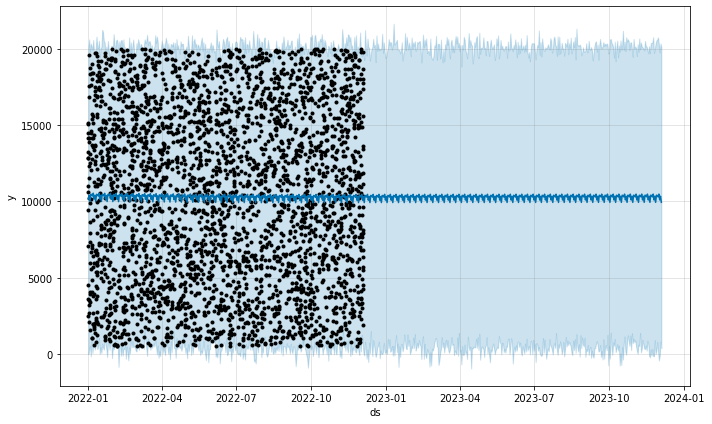

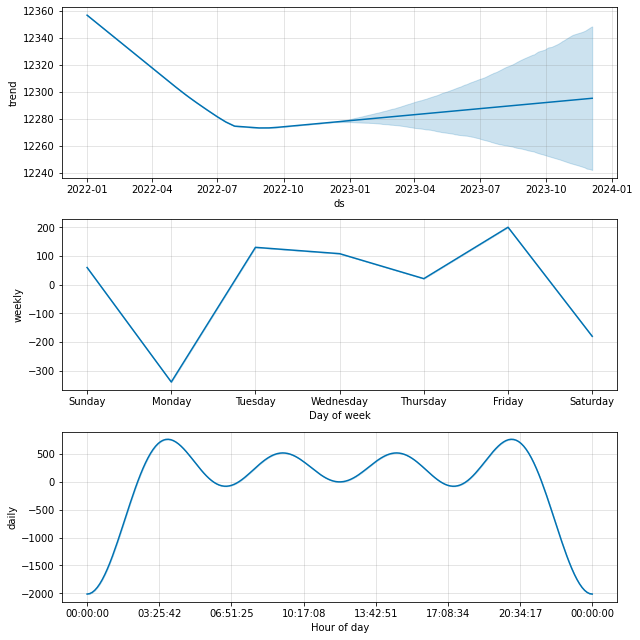

In [3]:
import mysql.connector as connection
from prophet import Prophet
import pandas as pd

mydb = connection.connect(
                     host="db-apibeekepeer.cdqxvmj3d7xx.us-east-1.rds.amazonaws.com",    # your host, usually localhost
                     user="admin",         # your username
                     passwd="datamin3",  # your password
                     db="Tienda"
                     )        # name of the data base

query = "Select ds,y from Tienda.price"
df = pd.read_sql(query,mydb)
df.head()

# print(df.info())

p = Prophet(interval_width=0.92, daily_seasonality=True)
model = p.fit(df)

future = p.make_future_dataframe(periods=365, freq='D')
future.tail()

forecast_prediction = p.predict(future)
forecast_prediction.tail()

plot1 = p.plot(forecast_prediction)

plot2 = p.plot_components(forecast_prediction)

 

In [2]:
pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.9 MB 4.2 MB/s 
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp38-cp38-linux_x86_64.whl size=249470 sha256=8f9a1bb09ea9f6e6f8a438dae604cc28664eddc45a01af58f28119b4f1e7a3ff
  Stored in directory: /root/.cache/pip/wheels/f5/66/87/6d9cef740fd440ef390930fdbe6c761dc1efef78ec94a288fd
Successfully built mysql-connector-python-rf
